### **Problem Statement:**

The sentiment analysis of tweets using natural language processing and machine learning techniques. The goal is to classify tweets into two categories based on their sentiment: positive (0) and negative (1).

### Load Data


In [ ]:
!gdown --id 1Od-QoZEQ1mFXxt51mgYUXXrSZW7TbcOG

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Od-QoZEQ1mFXxt51mgYUXXrSZW7TbcOG
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 93.3MB/s]


# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sentiment_analysis.csv')

In [ ]:
data.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [ ]:
data.shape

(7920, 3)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


Text Preprocessing

In [ ]:
import re
import string

In [ ]:
data["tweet"].head(5)

,tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,Finally a transparant silicon case ^^ Thanks t...
2,We love this! Would you go? #talk #makememorie...
3,I'm wired I know I'm George I was made that wa...
4,What amazing service! Apple won't even talk to...


convert uppercase to lowercase

In [ ]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
data["tweet"].head(5)

,tweet
0,#fingerprint #pregnancy test https://goo.gl/h1...
1,finally a transparant silicon case ^^ thanks t...
2,we love this! would you go? #talk #makememorie...
3,i'm wired i know i'm george i was made that wa...
4,what amazing service! apple won't even talk to...


remove links

In [ ]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [ ]:
data["tweet"].head(5)

,tweet
0,#fingerprint #pregnancy test #android #apps #...
1,finally a transparant silicon case ^^ thanks t...
2,we love this! would you go? #talk #makememorie...
3,i'm wired i know i'm george i was made that wa...
4,what amazing service! apple won't even talk to...


Remove punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [ ]:
data["tweet"].head(5)

,tweet
0,fingerprint pregnancy test android apps beaut...
1,finally a transparant silicon case thanks to ...
2,we love this would you go talk makememories un...
3,im wired i know im george i was made that way ...
4,what amazing service apple wont even talk to m...


In [ ]:
data["tweet"].tail(10)

,tweet
7910,perfect match instagood applewatch red instagr...
7911,i am completely in love with the new iphone em...
7912,tune in turn on drop out gtd in one app mobi...
7913,ok so my galaxy crashed after one day now i ha...
7914,gain followers rt this must follow me i follow...
7915,live out loud lol liveoutloud selfie smile son...
7916,we would like to wish you an amazing day make ...
7917,helping my lovely 90 year old neighbor with he...
7918,finally got my smart pocket wifi stay connecte...
7919,apple barcelona apple store bcn barcelona trav...


In [ ]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [ ]:
data["tweet"].tail(10)

,tweet
7910,perfect match instagood applewatch red instagr...
7911,i am completely in love with the new iphone em...
7912,tune in turn on drop out gtd in one app mobi...
7913,ok so my galaxy crashed after one day now i ha...
7914,gain followers rt this must follow me i follow...
7915,live out loud lol liveoutloud selfie smile son...
7916,we would like to wish you an amazing day make ...
7917,helping my lovely year old neighbor with her ...
7918,finally got my smart pocket wifi stay connecte...
7919,apple barcelona apple store bcn barcelona trav...


Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Get the list of English stopwords
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Write stopwords to a text file
with open('stopwords.txt', 'w') as file:
    for word in sw:
        file.write(f"{word}\n")

# Use Google Colab utility to download the file
from google.colab import files
files.download('stopwords.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [ ]:
data["tweet"].head(10)

,tweet
0,fingerprint pregnancy test android apps beauti...
1,finally transparant silicon case thanks uncle ...
2,love would go talk makememories unplug relax i...
3,im wired know im george made way iphone cute d...
4,amazing service apple wont even talk question ...
5,iphone software update fucked phone big time s...
6,happy us instapic instadaily us sony xperia xp...
7,new type c charger cable uk … bay amazon etsy ...
8,bout go shopping listening music iphone justme...
9,photo fun selfie pool water sony camera picoft...


Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [ ]:
data["tweet"].head(10)

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love would go talk makememori unplug relax iph...
3,im wire know im georg made way iphon cute dave...
4,amaz servic appl wont even talk question unles...
5,iphon softwar updat fuck phone big time stupid...
6,happi us instap instadaili us soni xperia xperiaz
7,new type c charger cabl uk … bay amazon etsi n...
8,bout go shop listen music iphon justm music li...
9,photo fun selfi pool water soni camera picofth...


In [ ]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


Building Vacabulary

In [ ]:
from collections import Counter
vocab = Counter()

In [ ]:
vocab

Counter()

In [ ]:
data['tweet']

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love would go talk makememori unplug relax iph...
3,im wire know im georg made way iphon cute dave...
4,amaz servic appl wont even talk question unles...
...,...
7915,live loud lol liveoutloud selfi smile soni mus...
7916,would like wish amaz day make everi minut coun...
7917,help love year old neighbor ipad morn made rea...
7918,final got smart pocket wifi stay connect anyti...


In [ ]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [ ]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [ ]:
len(vocab)

15949

In [ ]:
tokens = [key for key in vocab if vocab[key] > 10]

In [ ]:
len(tokens)

1145

In [ ]:
# Save tokens to a text file
filename = '/content/vocabulary.txt'
with open(filename, 'w') as file:
    for token in tokens:
        file.write(f"{token}\n")

In [ ]:
# Provide a link to download the file
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Divide dataset

In [ ]:
X = data['tweet']
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((6336,), (1584,))

In [ ]:
y_train.shape, y_test.shape

((6336,), (1584,))

In [ ]:
X_test.head(2)

,tweet
5048,tri restor phone back gonna loos everyth fd un...
6178,cadillac coup at monoton still bling follow in...


In [ ]:
X_train.head(2)

,tweet
7547,ravpow rpwd filehub limit time link video via ...
2062,olloclip dope fishey win jj appl iphonegang ig...


In [ ]:
y_test.head(2)

,label
5048,0
6178,0


In [ ]:
y_test.head(2)

,label
5048,0
6178,0


Vectorization

In [ ]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [ ]:
vectorized_x_train = vectorizer(X_train, tokens)

In [ ]:
for i in vectorized_x_train[0]:
    print(i)

0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
vectorized_x_test = vectorizer(X_test, tokens)

In [ ]:
vectorized_x_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.value_counts()

,count
label,
0,4689
1,1647


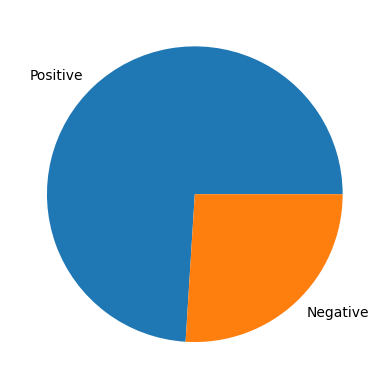

In [ ]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Handle imbalanced dataset


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9378, 1145) (9378,)


In [ ]:
y_train_smote.value_counts()

,count
label,
0,4689
1,4689


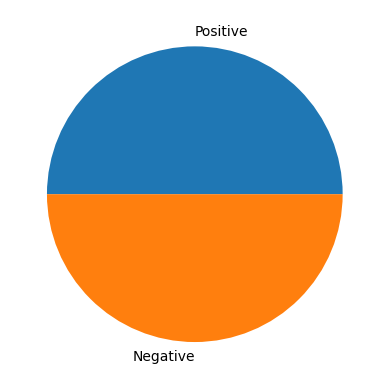

In [ ]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [ ]:
vectorized_x_train_smote

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_smote

,label
0,0
1,0
2,0
3,0
4,0
...,...
9373,1
9374,1
9375,1
9376,1


In [ ]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

,label
5048,0
6178,0
4027,0
1411,0
978,0
...,...
1500,1
6424,0
4780,1
2504,0


# Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.91
	Recall = 0.967
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.891
	Precision = 0.732
	Recall = 0.858
	F1-Score = 0.79


Naive Bayes

In [ ]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.903
	Precision = 0.864
	Recall = 0.955
	F1-Score = 0.908
Testing Scores:
	Accuracy = 0.885
	Precision = 0.698
	Recall = 0.916
	F1-Score = 0.792


Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.84
	Precision = 0.67
	Recall = 0.649
	F1-Score = 0.66


Random Forest

In [ ]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 0.999
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.876
	Precision = 0.759
	Recall = 0.704
	F1-Score = 0.731


Support Vector Machine

In [ ]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.977
	Precision = 0.96
	Recall = 0.995
	F1-Score = 0.977
Testing Scores:
	Accuracy = 0.896
	Precision = 0.763
	Recall = 0.823
	F1-Score = 0.792


In [ ]:
import pickle

# Save the model using pickle
model_filename = '/content/model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
# Provide a link to download the file
from google.colab import files
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediction Pipeline

In [ ]:
# Load the saved model
with open('/content/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Load vocabulary from vocabulary.txt
vocab = []
with open('vocabulary.txt', 'r') as file:
    vocab = [line.strip() for line in file.readlines()]

print("Vocabulary size:", len(vocab))

Vocabulary size: 1145


In [ ]:
# Load stopwords from stopwords.txt
stopwords_list = []
with open('stopwords.txt', 'r') as file:
    stopwords_list = [line.strip() for line in file.readlines()]

print("Number of stopwords:", len(stopwords_list))

Number of stopwords: 179


In [ ]:
def preprocessing(text):
    data = pd.DataFrame([text], columns=['tweet'])
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
    data["tweet"] = data["tweet"].apply(remove_punctuations)
    data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
    return data["tweet"]

In [ ]:
def get_prediction(vectorized_text):
    prediction = model.predict(vectorized_text)
    if prediction == 1:
        return 'negative'
    else:
        return 'positive'

In [ ]:
txt = "good product. i love it"
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'positive'